<a href="https://colab.research.google.com/github/Don-Withana/bank-term-deposit-prediction/blob/main/bank_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Marketing - Term Deposit Prediction**

##### **Machine Learning (CM2604) - Assessment**
##### **Name: Himan Withana**
##### **RGU Username: 2330926**
##### **IIT ID: 20231051**
##### **GitHub - https://github.com/Don-Withana**

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Apply style to matplotlib plots
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")

#For pretty-printing tabular data
!pip install tabulate
from tabulate import tabulate

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

Saving bank-full-cleaned.csv to bank-full-cleaned.csv


In [3]:
df=pd.read_csv("bank-full-cleaned.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## **Data Inispection**

In [6]:
df.shape

(45211, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.duplicated().sum()

0

In [11]:
pd.DataFrame({'Number of Null Values':df.isna().sum()})

,Number of Null Values
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## **Understanding Features**

In [12]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [13]:
categorical_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
print('Number of categorical features: ', len(categorical_features))
df[categorical_features].head()

Number of categorical features:  10


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [14]:
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O')]
print('Number of numerical features: ', len(numerical_features))
df[numerical_features].head()

Number of numerical features:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [15]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Features Count: {}".format(len(discrete_features)))

Discrete Features Count: 0


In [16]:
discrete_features

[]

In [17]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print("Continuous Feature Count {}".format(len(continuous_features)))

Continuous Feature Count 7


In [18]:
continuous_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
for col in df.columns:
    print(df[col].value_counts())
    print('_'*45)

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
_____________________________________________
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
_____________________________________________
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
_____________________________________________
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
_____________________________________________
default
no     44396
yes      815
Name: count, dtype: int64
_____________________________________________
balance
 0        3514
 1         195
 2         156


## **Data Wrangling & Feature Engineering**

#### **Handling Duplicate Values**

In [20]:
df.duplicated().sum()

0

#### **Handling Null / Missing Values**

In [21]:
def identify_unknown_columns(df):
    unknown_counts = df.isin(['unknown']).sum()
    unknown_columns = unknown_counts[unknown_counts > 0]
    return unknown_columns

unknown_columns = identify_unknown_columns(df)
print(unknown_columns)

job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


In [22]:
df = df.replace('unknown', np.nan)

In [23]:
null_values = df.isnull().sum()
null_percentage = round(df.isnull().sum()*100/len(df),2)
null_df=pd.DataFrame({'Columns':df.columns,'Number of Null Values':null_values,'Percentage':null_percentage})
null_df.set_index('Columns').sort_values(by='Percentage', ascending = False)

,Number of Null Values,Percentage
Columns,,
poutcome,36959,81.75
contact,13020,28.80
education,1857,4.11
job,288,0.64
month,0,0.00
previous,0,0.00
pdays,0,0.00
campaign,0,0.00
duration,0,0.00


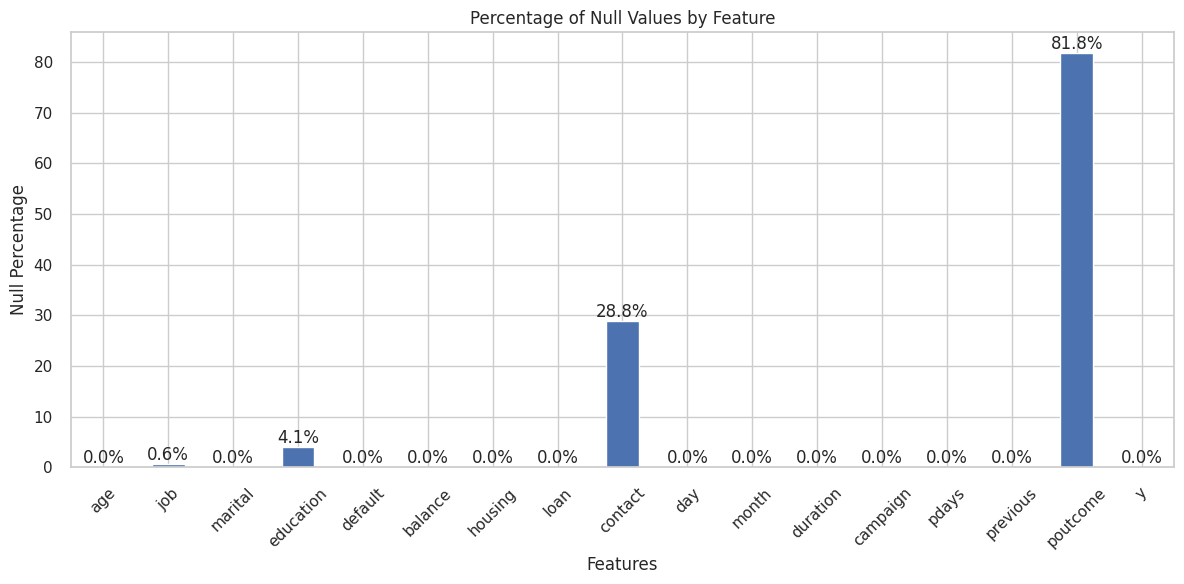

In [24]:
plt.figure(figsize=(12, 6))
ax = null_percentage.plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.1f%%')
plt.title('Percentage of Null Values by Feature')
plt.xlabel('Features')
plt.ylabel('Null Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Missing values in the dataset with respect to its features')

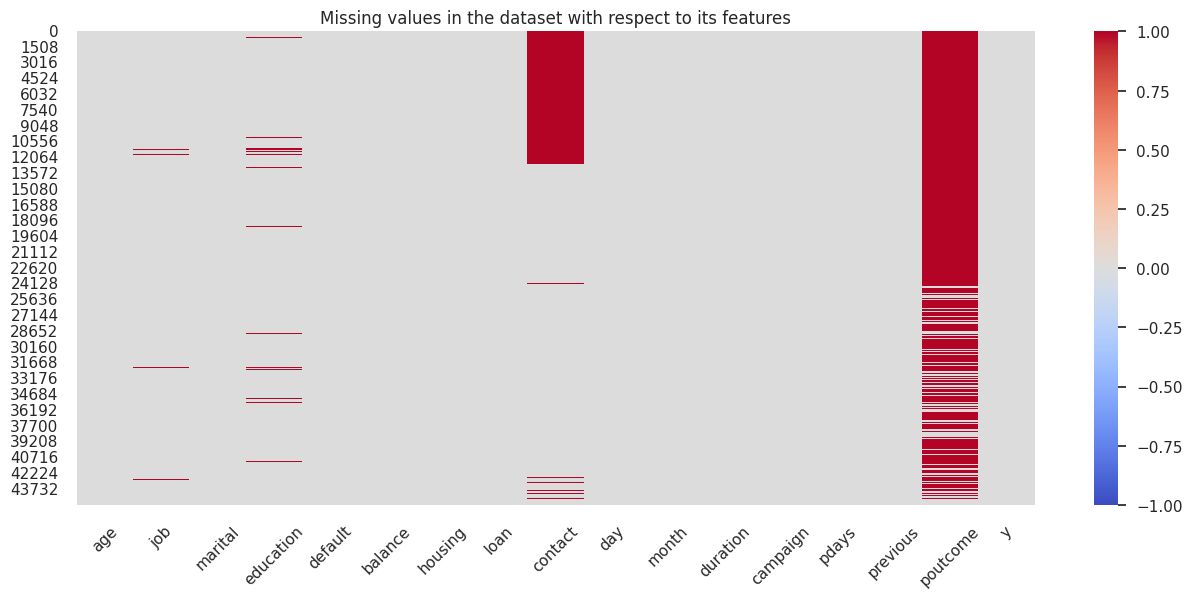

In [25]:
plt.figure(figsize=(13,6))
sns.heatmap(df.isnull(),cbar=True,vmin=-1, cmap='coolwarm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Missing values in the dataset with respect to its features')

In [26]:
null_features=['poutcome','contact','education','job']
for features in null_features:
    print(df[features].value_counts())
    print('_'*45)

poutcome
failure    4901
other      1840
success    1511
Name: count, dtype: int64
_____________________________________________
contact
cellular     29285
telephone     2906
Name: count, dtype: int64
_____________________________________________
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
_____________________________________________
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
_____________________________________________


In [27]:
df.drop(columns='poutcome', inplace=True)

In [28]:
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [29]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [30]:
df.shape

(45211, 16)

#### **Handling Outliers**

________________________________________________________________________________


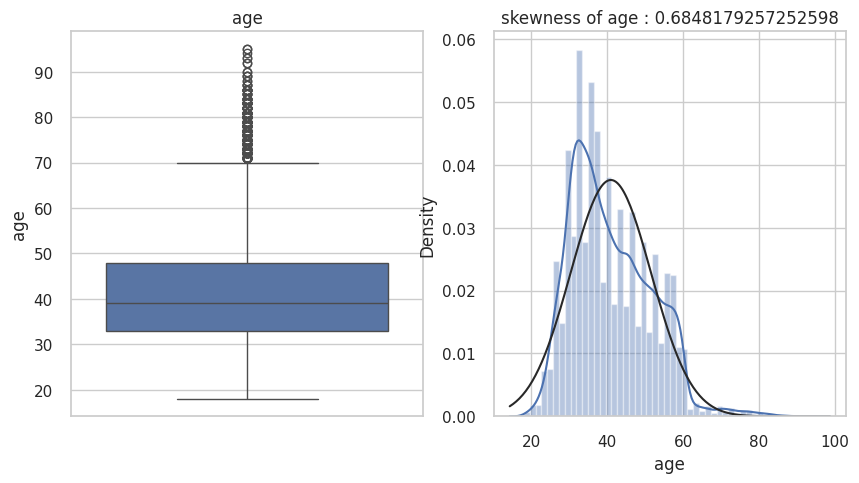

________________________________________________________________________________


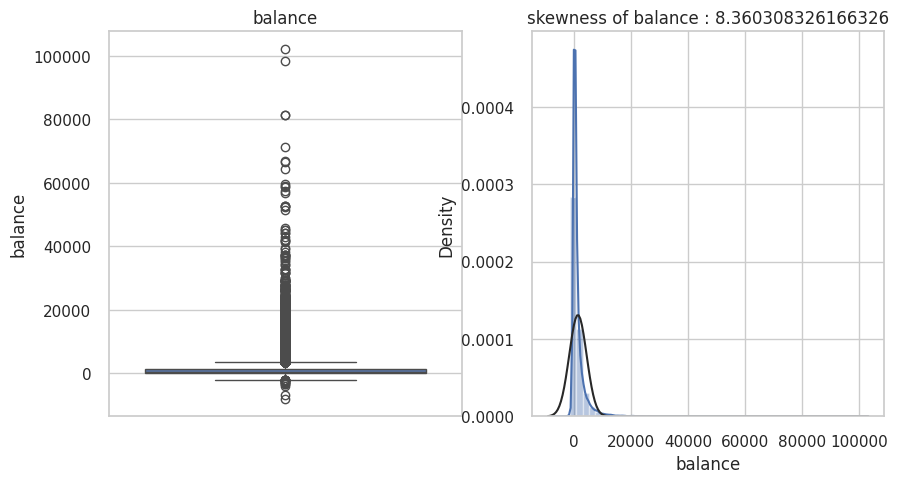

________________________________________________________________________________


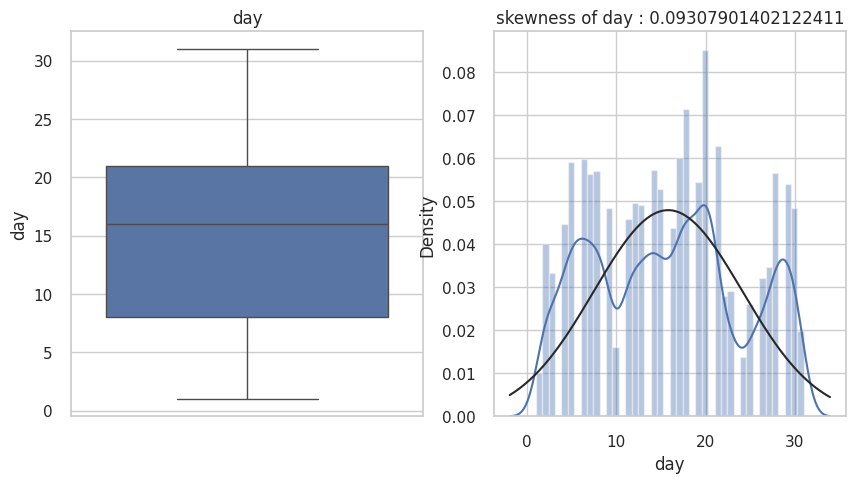

________________________________________________________________________________


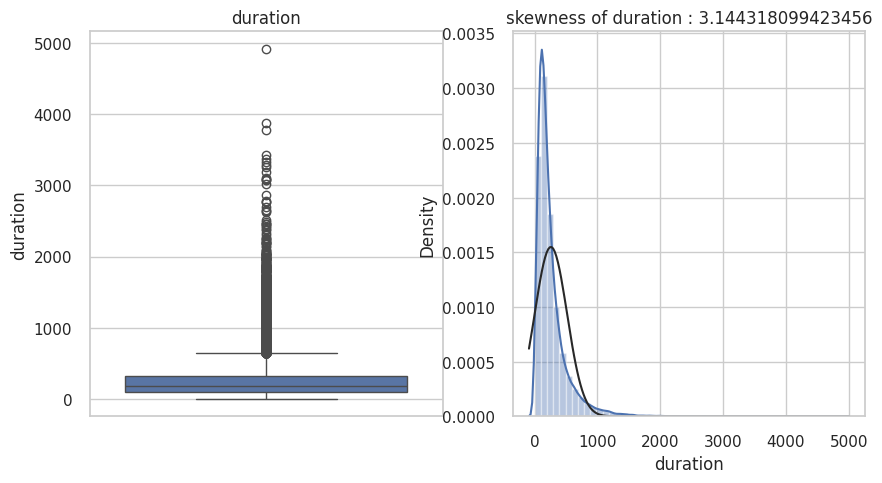

________________________________________________________________________________


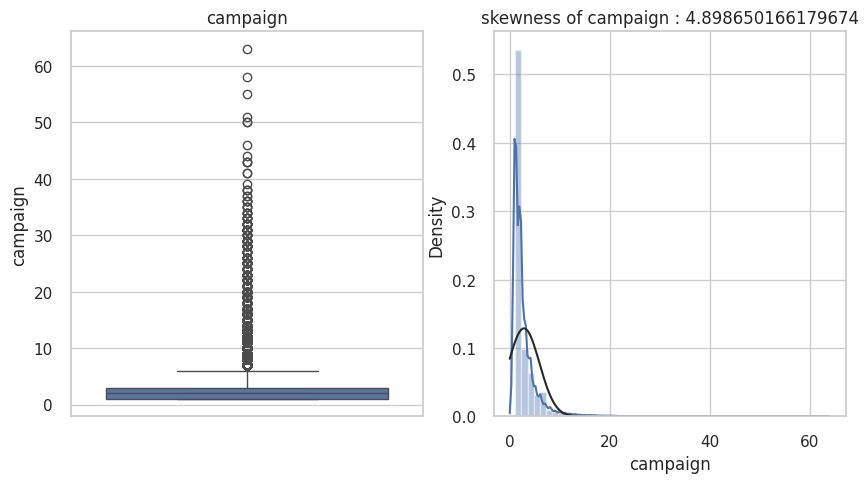

________________________________________________________________________________


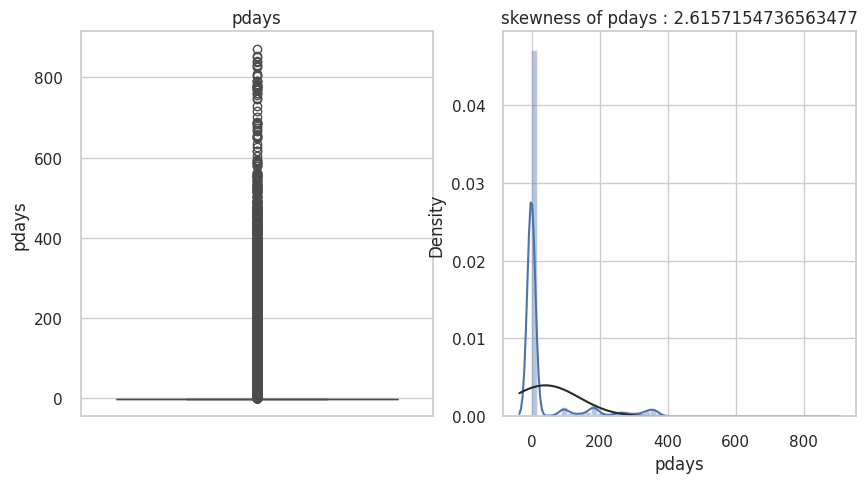

________________________________________________________________________________


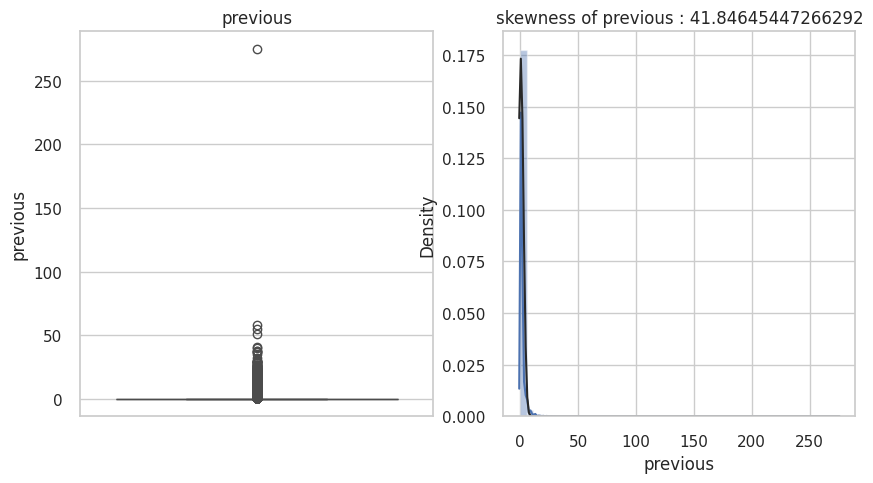

In [31]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Plotting Box and Distribution plots
for feature in numerical_features:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[feature])
    ax.set_title(f'{feature}')
    ax.set_ylabel(feature)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[feature], fit=norm)
    ax.set_title(f'skewness of {feature} : {df[feature].skew()}')
    ax.set_xlabel(feature)
    print('__'*40)
    plt.show()

**Observation:**
*   The features age, balance, duration, campaign, pdays, and previous have outliers. Since pdays and previous show a flat interquartile range, it's best to remove those columns.
*   The feature day does not contain any outliers.



In [32]:
# Using the IQR, remove outliers from numerical features
# Defining outlier features without flat IQR features
outlier_feature=['age', 'balance', 'duration', 'campaign']

for i in outlier_feature:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each feature
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

________________________________________________________________________________


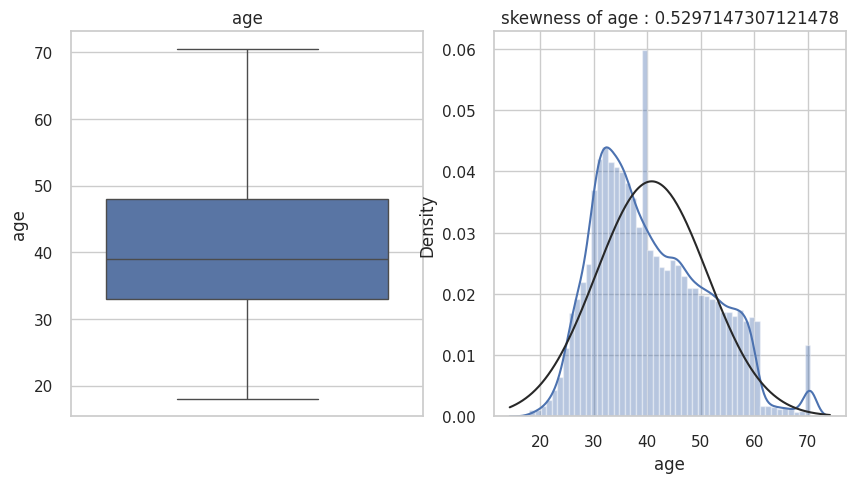

________________________________________________________________________________


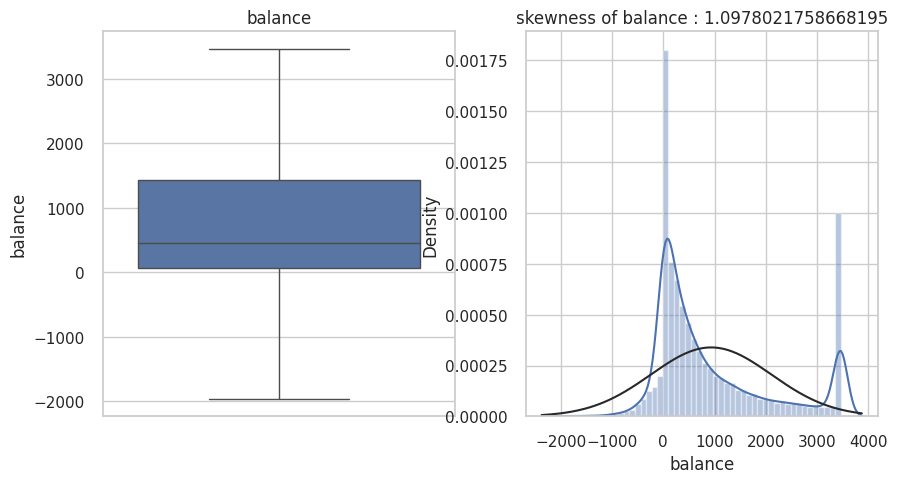

________________________________________________________________________________


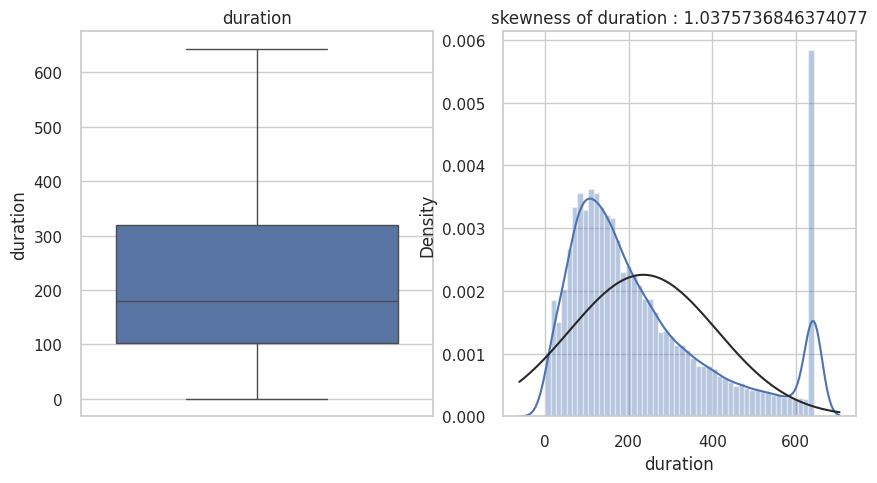

________________________________________________________________________________


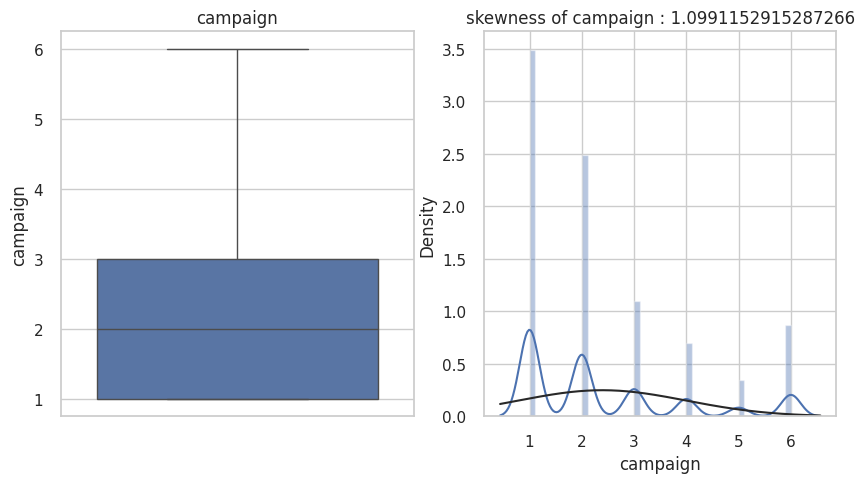

In [33]:
# Checking outliers in features
for feature in outlier_feature:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[feature])
    ax.set_title(f'{feature}')
    ax.set_ylabel(feature)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[feature], fit=norm)
    ax.set_title(f'skewness of {feature} : {df[feature].skew()}')
    ax.set_xlabel(feature)
    print('__'*40)
    plt.show()

## **Exploratory Data Analysis**

#### **Univariate Analysis**

In [34]:
# Defining r to automatically adjust the number and size of plots
r = int(len(df.columns))

In [35]:
# Defining a function to annotate the percentage count of each value on the bars
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

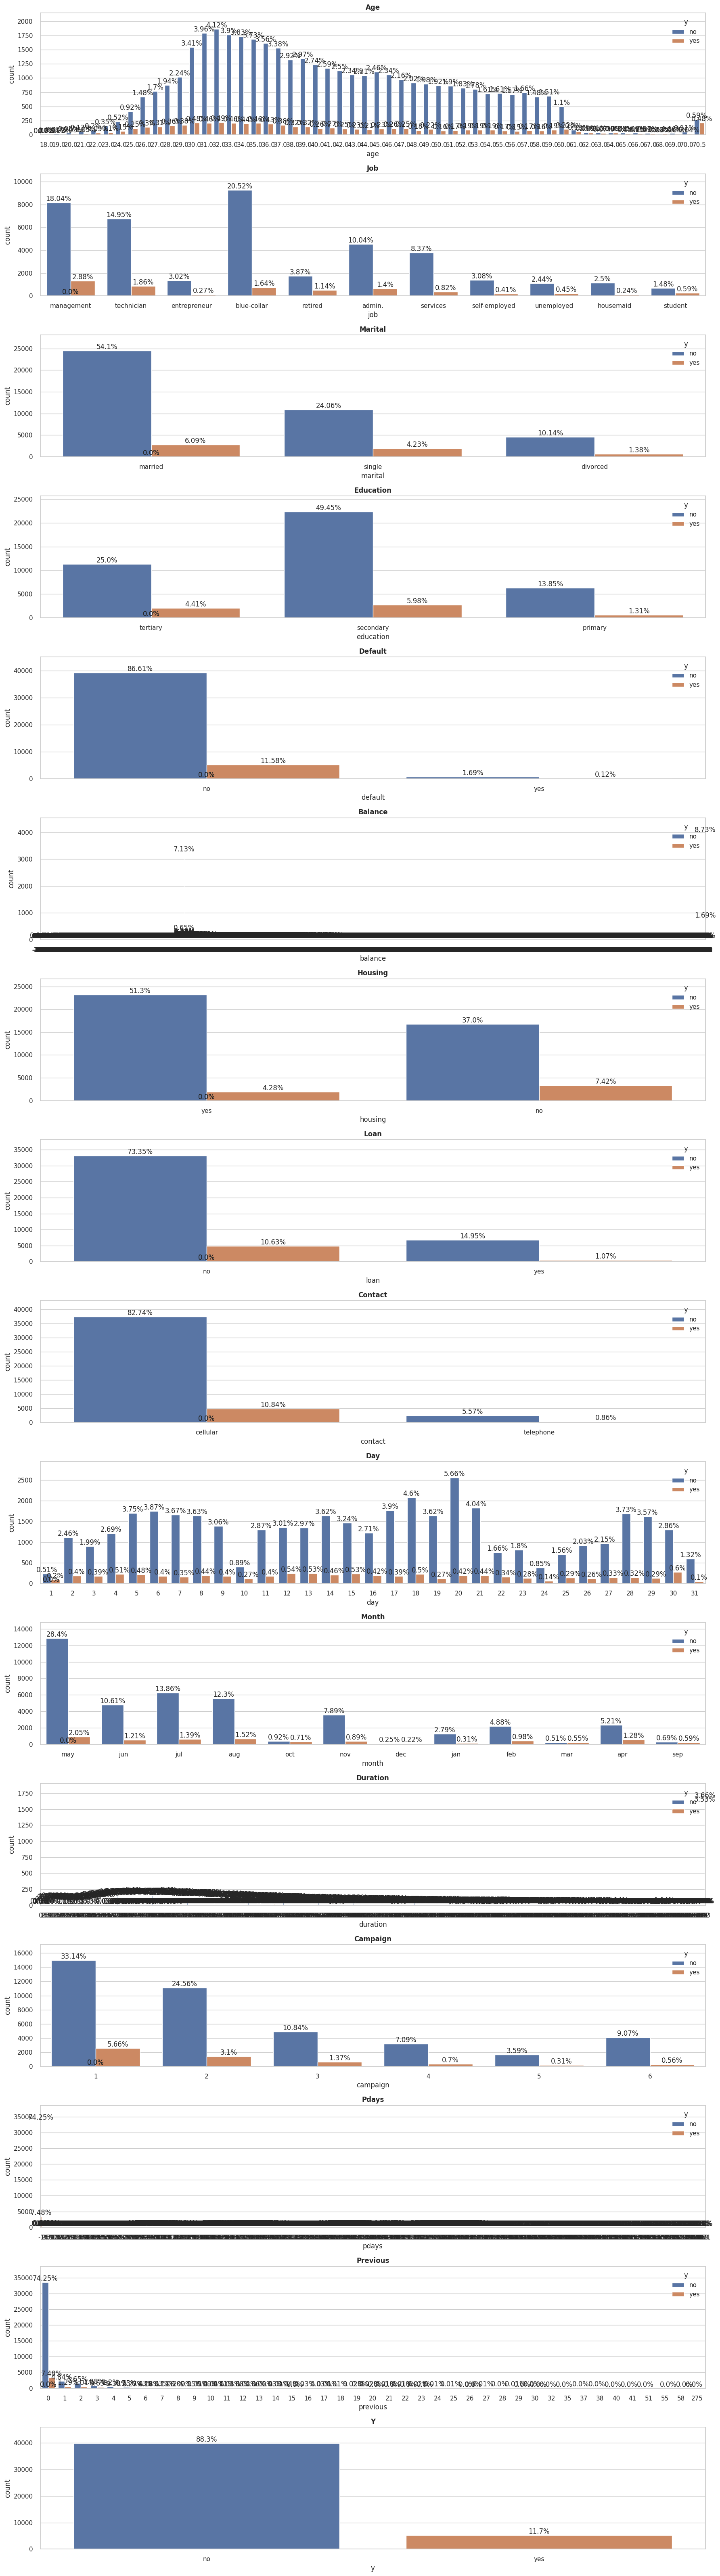

In [36]:
# Plotting the count plots for each feature in the target_feature list
plt.figure(figsize=(18,r*4))
for n,feature in enumerate(df.columns):
    plot = plt.subplot(r,1,n+1)
    sns.countplot(x=df[feature], hue=df['y']).margins(y=0.15)
    plt.title(f'{feature.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

**Observations:**
- The typical client is aged between 25 and 60, with the majority of bank term deposits being made by clients aged 30 to 40.
- Most clients with blue-collar jobs do not subscribe to bank term deposits, and the majority of subscriptions come from managerial jobs.
- Most clients are married. Married clients are both the most and the least likely to subscribe to term deposits.
- Clients with education levels higher than primary are more likely to subscribe to a term deposit.
- The majority of clients who subscribed to term deposits have no credit defaults.
- The majority of clients who have subscribed to a term deposit do not possess a housing loan.
- Clients with a housing loan are less likely to subscribe to a term deposit.
- Clients without personal loans are more likely to subscribe to a term deposit.
- Clients who were contacted via cellular are mostly subscribed to term deposits.
- In May, April, June, July, and August, more than 1% of clients subscribed to the term deposit.
- The subscriber rate in May is more than double that of the other months of the year.
- Only 11.7% of total clients subscribe to term deposits, meaning there is an 88.3% chance that clients will not subscribe.

#### **Bivariate Analysis**

<Axes: title={'center': 'The number of clients who subscribed bank term deposit as per their job and education'}, xlabel='job,education,y'>

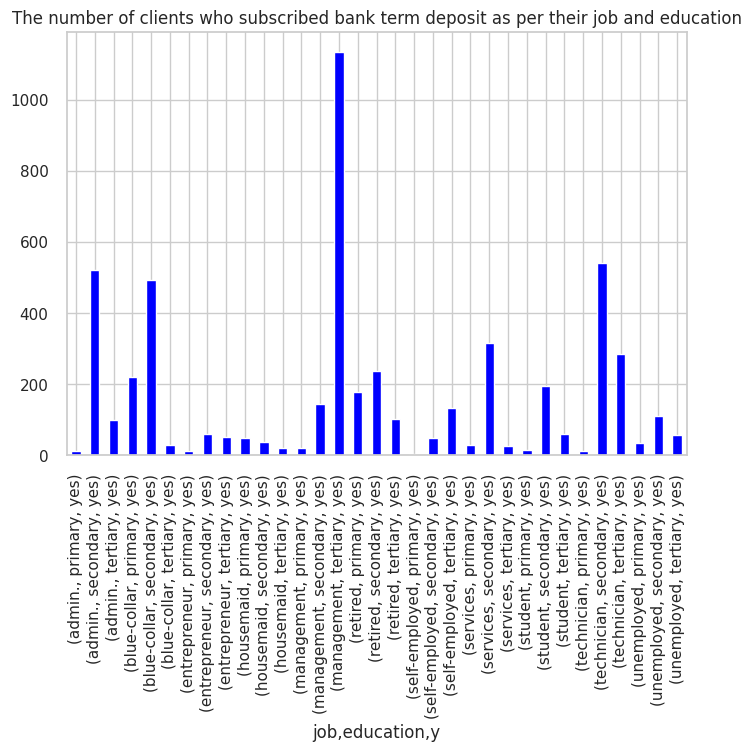

In [37]:
# Creating a count plot to visualize the distribution of customers based on their job types and education levels.
subscribed_df = df[df.y=='yes']
subscribed_df2=subscribed_df.groupby(['job','education','y'])['y'].count()
subscribed_df2.plot(
    kind = "bar",
    title = 'The number of clients who subscribed bank term deposit as per their job and education',
    color = "blue")

**Observations:**
- Most clients with management-related jobs & tertiary education have signed up for term deposits.
- Customers with secondary education are the second most frequent subscribers to term deposits.

<Axes: title={'center': 'The number of clients aged 30 to 40 who subscribed to a bank term deposit, categorized by their job'}, xlabel='age,job,y'>

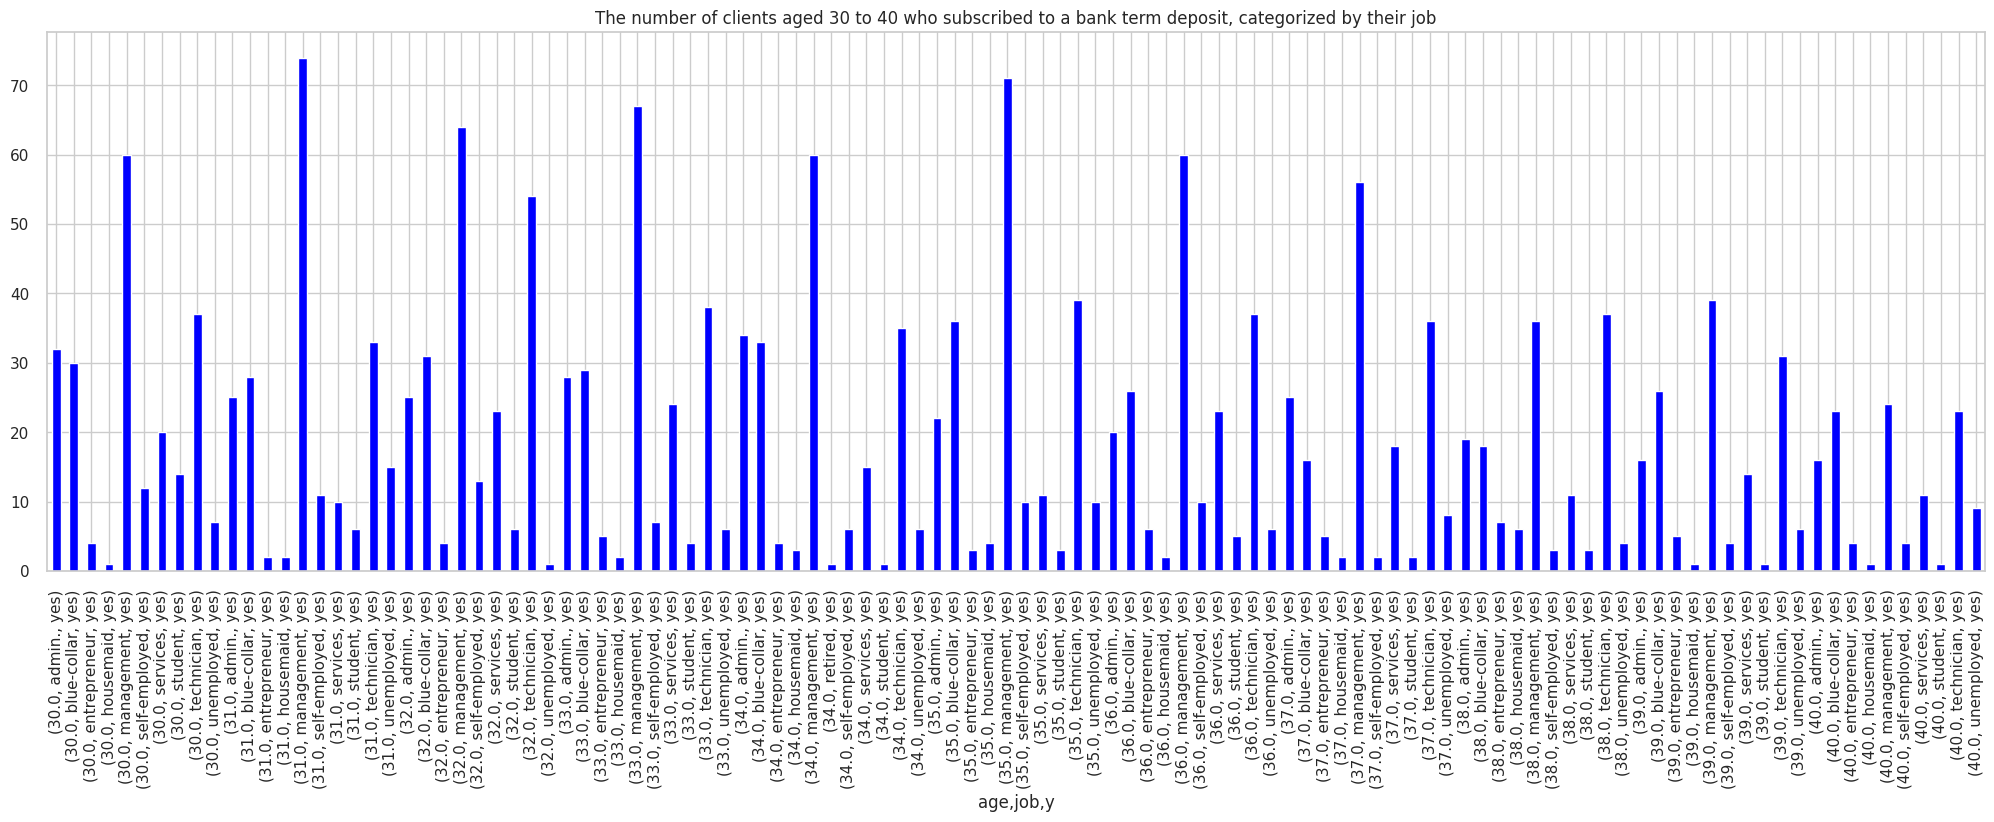

In [38]:
# Creating a count plot to visualize the distribution of customers based on their age and job types.
subscribed_df = df[(df['y'] == 'yes') & (df['age'] >= 30) & (df['age'] <= 40)]
subscribed_df2 = subscribed_df.groupby(['age', 'job', 'y'])['y'].count()
plt.figure(figsize=(25, 7))
subscribed_df2.plot(
    kind='bar',
    title='The number of clients aged 30 to 40 who subscribed to a bank term deposit, categorized by their job',
    color='blue')

**Observations:**
- The most of clients aged 30 to 40 with management-related jobs have subscribed to term deposits.
- Most unemployed clients aged 30 to 40 do not prefer subscribed to term deposits.

<Axes: title={'center': 'The number of clients aged 30 to 40 who subscribed to a bank term deposit, categorized by their education'}, xlabel='age,education,y'>

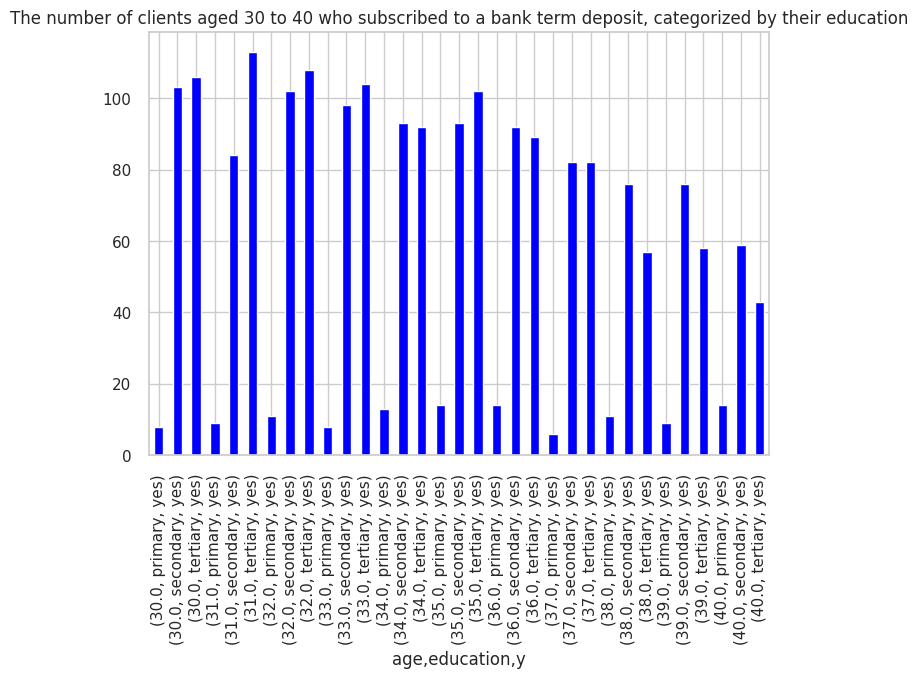

In [39]:
# Creating a count plot to visualize the distribution of customers based on their age and educaction levels.
subscribed_df = df[(df['y'] == 'yes') & (df['age'] >= 30) & (df['age'] <= 40)]
subscribed_df2 = subscribed_df.groupby(['age', 'education', 'y'])['y'].count()
subscribed_df2.plot(
    kind="bar",
    title='The number of clients aged 30 to 40 who subscribed to a bank term deposit, categorized by their education',
    color="blue")

**Observations:**
- Most clients aged 30 to 40 with secondary or tertiary education have subscribed to term deposits.
- Most clients aged 30 to 40 with primary education do not prefer subscribing to term deposits.

<Axes: title={'center': 'The number of clients who signed up for a bank term deposit during a specific month, grouped by their job'}, xlabel='month,job,y'>

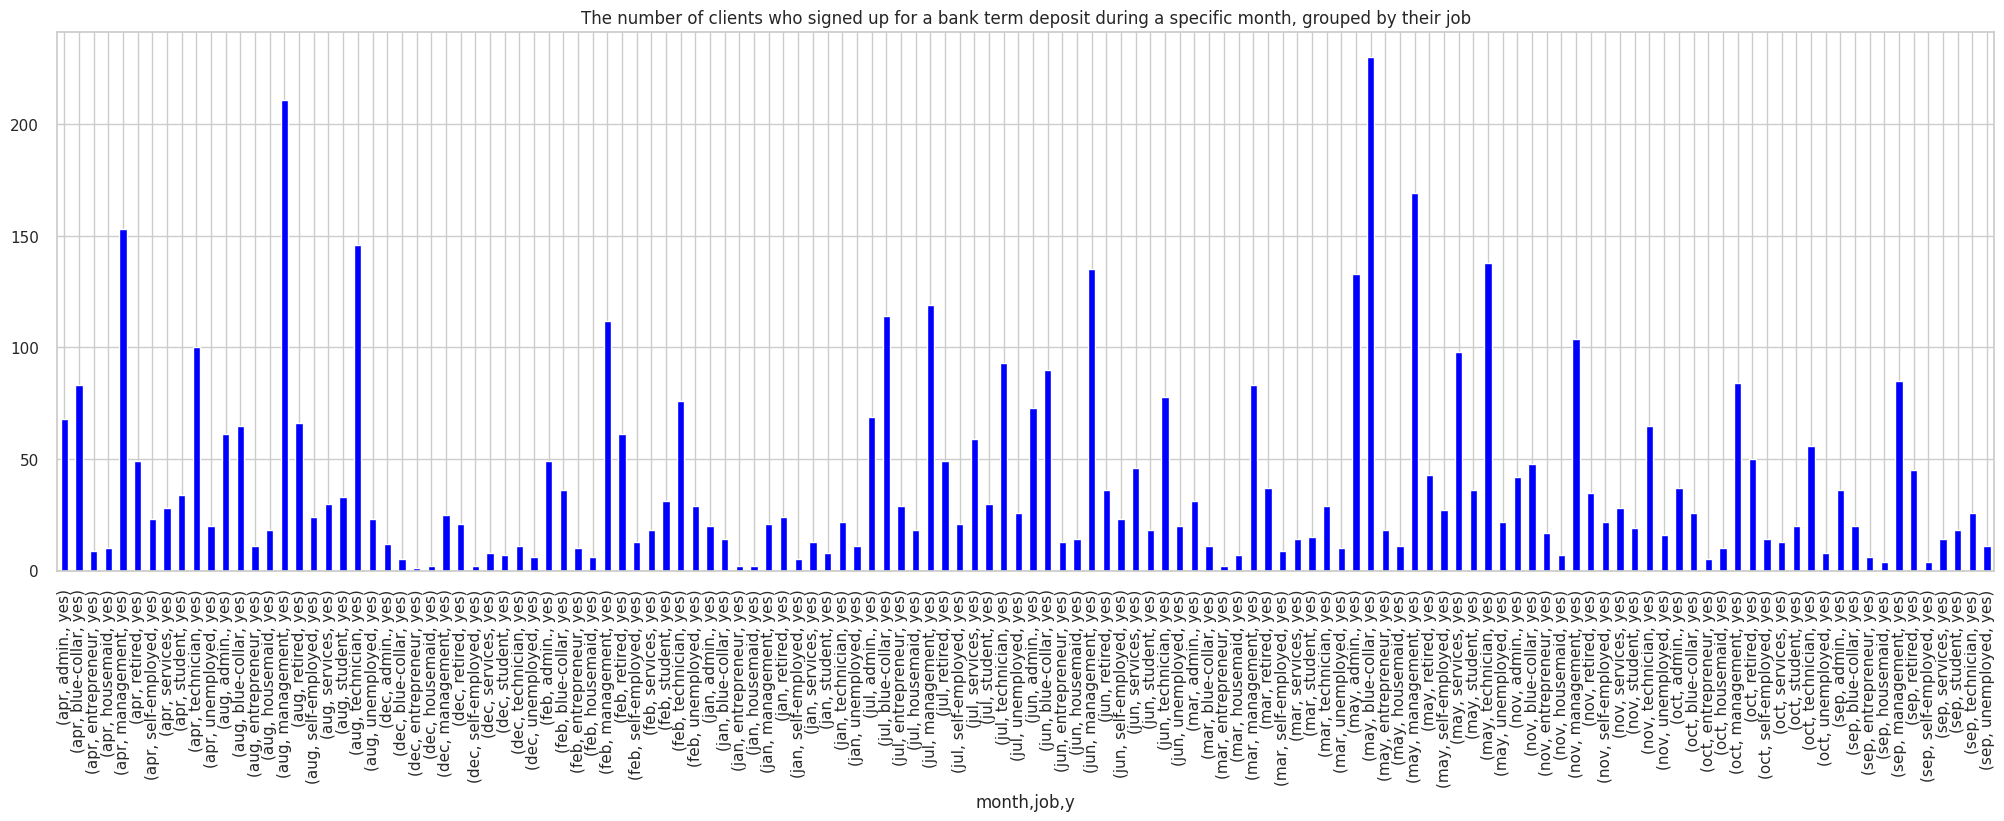

In [40]:
# Creating a count plot to visualize the distribution of customers based on month and proffession
subscribed_df = df[(df['y'] == 'yes')]
subscribed_df2 = subscribed_df.groupby(['month', 'job', 'y'])['y'].count()
plt.figure(figsize=(25, 7))
subscribed_df2.plot(
    kind="bar",
    title='The number of clients who signed up for a bank term deposit during a specific month, grouped by their job',
    color="blue")

**Observations:**
- The subscriptions for bank term deposits show clear variations across job categories and months, with certain professions like Management & Blue-Collar contributing significantly during peak months, highlighting the importance of targeting specific jobs during optimal periods.

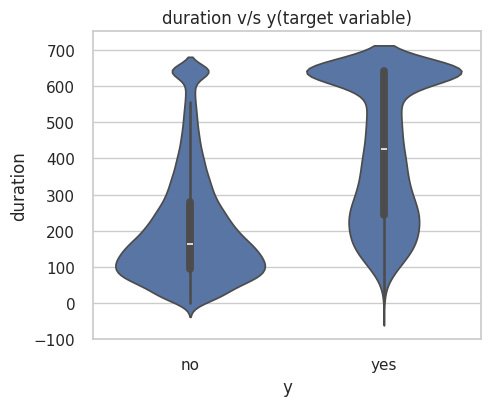

In [41]:
# Creating a box plot (violin plot) to visualize the distribution of call duration (in seconds) for the target variable.
plt.figure(figsize=(5,4))
ax=sns.violinplot(x=df['y'], y=df['duration'])
ax.set_title('duration v/s y(target variable)')
annot_percent(plot)
plt.show()

**Observations:**
- Clients are more likely to subscribe to term deposits if they spend a longer time on the phone.
- On average, 400 seconds are required to communicate a client's intent to subscribe and make a term deposit.

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan'}, xlabel='loan,housing,y'>

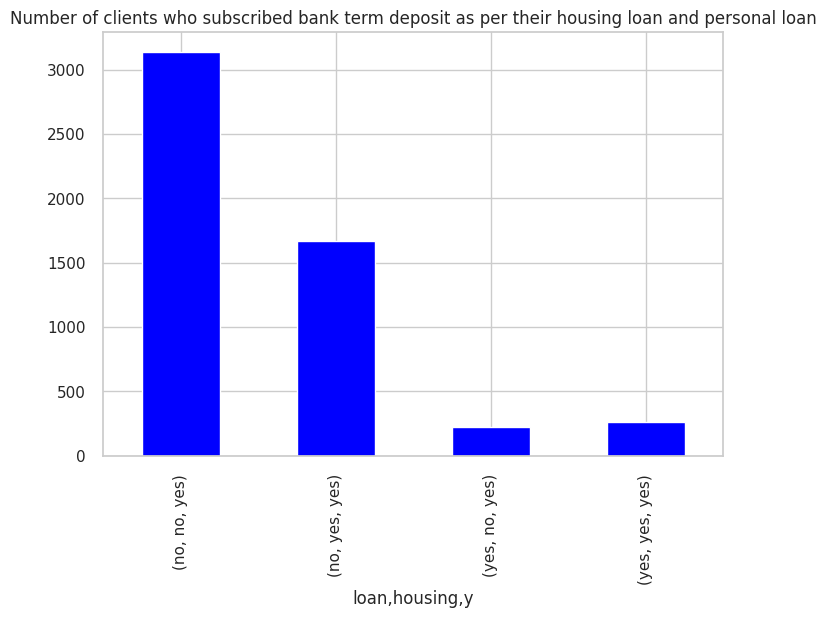

In [42]:
# Creating a count plot to visualize the distribution of customers based on their job types and education levels.
subscribed_df = df[df.y=='yes']
subscribed_df2=subscribed_df.groupby(['loan','housing','y'])['y'].count()
subscribed_df2.plot(
    kind = "bar",
    title = 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan',
    color = "blue")

**Observations:**
- A customer is more likely to subscribe to a term deposit if they are completely debt-free.
- Customers are less likely to choose a term deposit if they already have a personal loan.

#### **Multivariate Analysis**

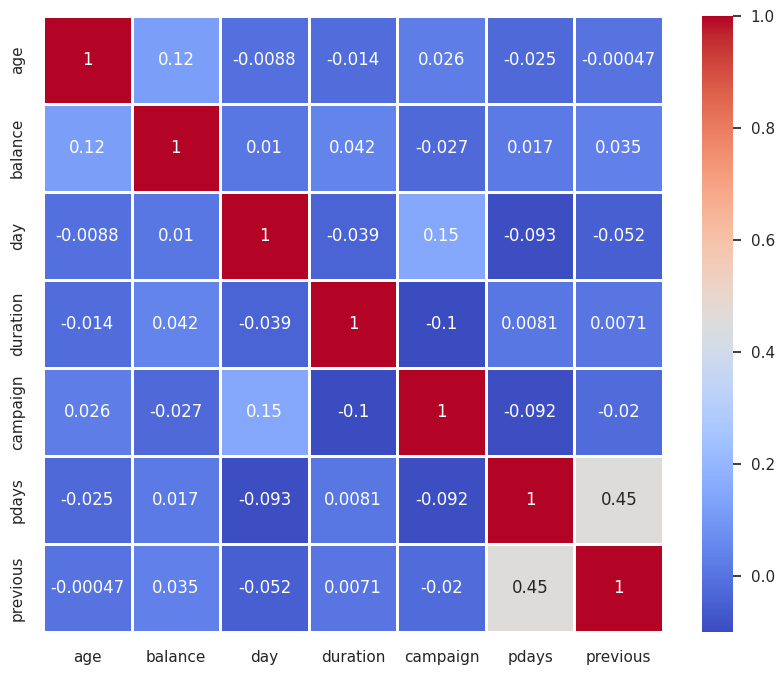

In [43]:
# Correlation calculation for numerical features
correlation_matrix = df[numerical_features].corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='coolwarm', linewidths=0.8)
plt.show()

**Observations:**
- There is no correlation between any of the independent variables, indicating minimal or no linear relationship between them.

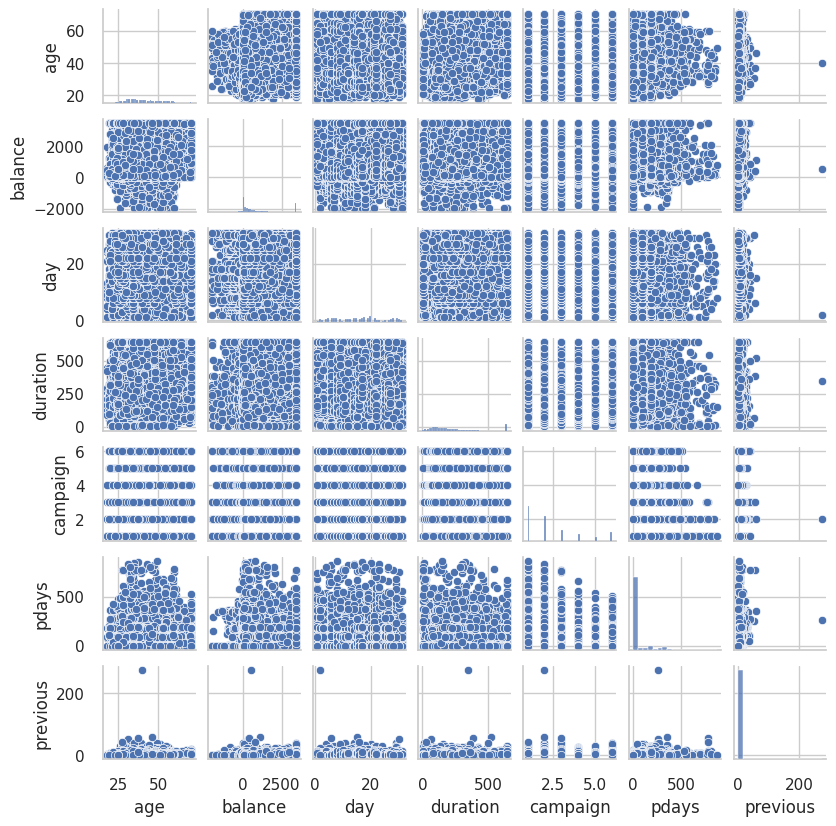

In [44]:
sns.pairplot(df, height=1.2)
plt.show()

## **Data Pre-processing**

#### **Categorical Encoding**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


In [46]:
categorical_features=df.describe(include=['object']).columns
print(f'Categorical features are : {list(categorical_features)}')

Categorical features are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']


In [47]:
for feature in categorical_features:
    print(df[feature].value_counts())
    print('_'*45)

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64
_____________________________________________
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
_____________________________________________
education
secondary    25059
tertiary     13301
primary       6851
Name: count, dtype: int64
_____________________________________________
default
no     44396
yes      815
Name: count, dtype: int64
_____________________________________________
housing
yes    25130
no     20081
Name: count, dtype: int64
_____________________________________________
loan
no     37967
yes     7244
Name: count, dtype: int64
_____________________________________________
contact
cellular     42305
telephone     2906
Name: count, dtype: int64
___________

**Observations:**
- Since the categorical features marital, education, default, housing, loan, contact, and y have only a few categories, label encoding can be applied. For the categorical features job and month, which have numerous categories, one-hot encoding is more suitable.

In [48]:
# label encoding
df['marital'] = df['marital'].map({'single':0,'married':1,'divorced':2})
df['education'] = df['education'].map({'secondary':0,'tertiary':1, 'primary':2})
df['default'] = df['default'].map({'yes':1,'no':0})
df['housing'] = df['housing'].map({'yes':1,'no':0})
df['loan'] = df['loan'].map({'yes':1,'no':0})
df['contact'] = df['contact'].map({'cellular':1,'telephone':0})
df['y'] = df['y'].map({'yes':1,'no':0})

In [49]:
# One-hot encoding
df=pd.get_dummies(df, columns=['job', "month"], prefix=["job", "month"], drop_first=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  float64
 1   marital            45211 non-null  int64  
 2   education          45211 non-null  int64  
 3   default            45211 non-null  int64  
 4   balance            45211 non-null  int64  
 5   housing            45211 non-null  int64  
 6   loan               45211 non-null  int64  
 7   contact            45211 non-null  int64  
 8   day                45211 non-null  int64  
 9   duration           45211 non-null  int64  
 10  campaign           45211 non-null  int64  
 11  pdays              45211 non-null  int64  
 12  previous           45211 non-null  int64  
 13  y                  45211 non-null  int64  
 14  job_blue-collar    45211 non-null  bool   
 15  job_entrepreneur   45211 non-null  bool   
 16  job_housemaid      452

In [51]:
# Final Dataset
pd.set_option('display.max_columns', None)
df.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58.0,1,1,0,2143,1,0,1,5,261,1,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,44.0,0,0,0,29,1,0,1,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
2,33.0,1,0,0,2,1,1,1,5,76,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,47.0,1,0,0,1506,1,0,1,5,92,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,33.0,0,0,0,1,0,0,1,5,198,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


#### **Separating Dependant & Independant variables**

In [52]:
dependent_feature = 'y'
independent_features = list(set(df.columns.tolist()) - {dependent_feature})

# Create the data of independent & dependent features
X = df[independent_features].copy()
y = df[dependent_feature].copy()

#### **Feature Manipulation & Selection**

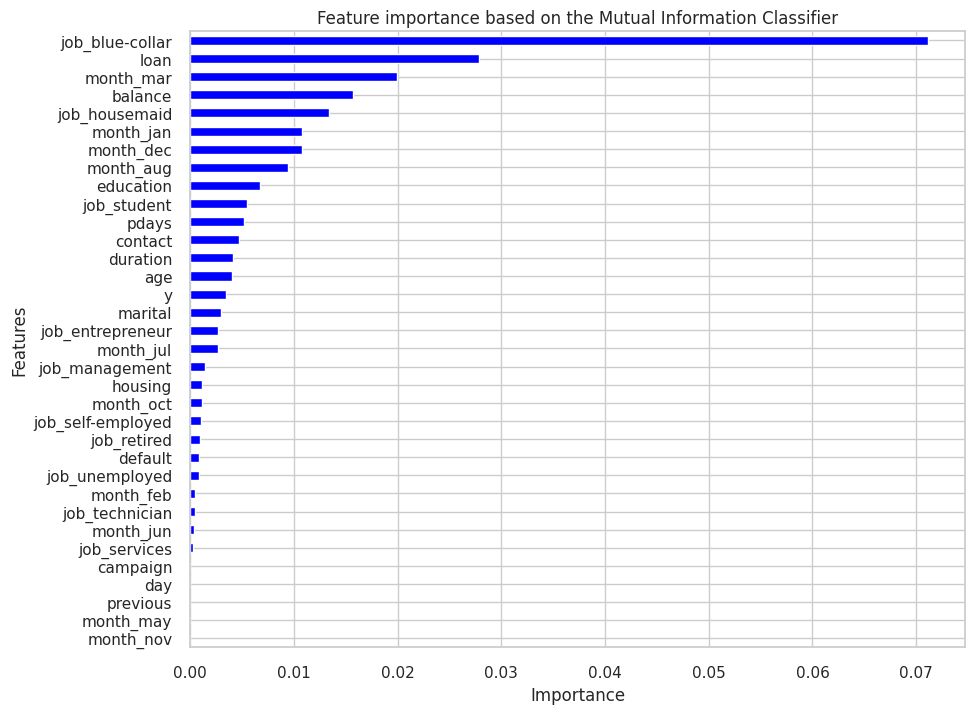

In [53]:
# Plotting feature importance to aid in better feature selection and avoid overfitting
from sklearn.feature_selection import mutual_info_classif

importance = mutual_info_classif(X,y)
feature_importances = pd.Series(importance,df.columns[0:len(df.columns[0:34])]).sort_values(ascending=True)
plt.figure(figsize=(10,8))
feature_importances.plot(kind='barh', color='blue')
plt.title("Feature importance based on the Mutual Information Classifier")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

**Observations:**
- The important features are listed in descending order of their significance and can be removed if they become less important. However, all the included features hold significant importance.

#### **Handling Imbalanced Dataset**

In [54]:
df.duplicated().sum()

0

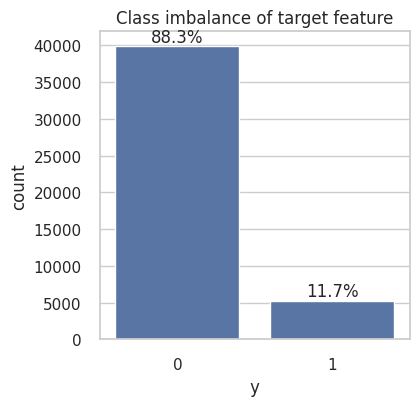

In [55]:
# Vizualize the class imbalance of target feature
plt.figure(figsize=(4,4))
plot=plt.subplot(111)
sns.countplot(x=df['y'])
plt.title('Class imbalance of target feature')
annot_percent(plot)
plt.show()

**Observations:**
- Clearly identifying a class imbalance.

In [56]:
!pip install imblearn

In [57]:
# Use SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

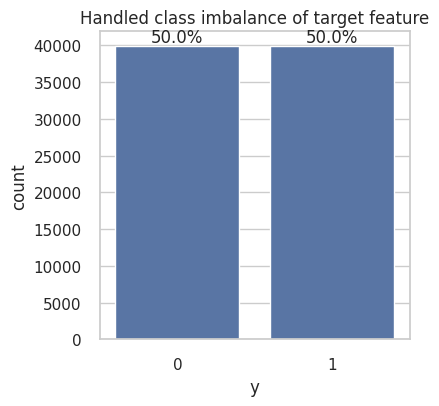

In [58]:
# Visualize the handled class imbalance of the target feature
plt.figure(figsize=(4,4))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Handled class imbalance of target feature')
annot_percent(plot)
plt.show()

**Observations:**
- Class imbalance has been successfully addressed using the SMOTE.

In [59]:
df.duplicated().sum()

0

#### **Data Splitting**

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Divide the dataset into 20% for model testing and 80% for training.
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [61]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (63875, 34)
Shape of X_test : (15969, 34)
Shape of y_train : (63875,)
Shape of y_test : (15969,)


In [62]:
X_train[0:5]

,month_oct,marital,month_mar,job_retired,housing,job_housemaid,pdays,campaign,default,education,job_self-employed,month_sep,month_jan,loan,duration,job_management,previous,job_unemployed,job_services,month_dec,month_jul,day,month_jun,job_entrepreneur,month_may,age,job_student,contact,month_aug,job_technician,balance,month_nov,month_feb,job_blue-collar
76180,False,1,False,True,0,False,86,1,0,1,False,False,False,0,310,True,3,False,False,False,False,10,False,False,False,70.028256,False,1,False,False,3324,False,True,False
36038,False,1,False,True,1,False,-1,1,0,1,False,False,False,1,67,False,0,False,False,False,False,11,False,False,True,50.000000,False,1,False,False,4,False,False,False
41791,True,1,False,False,0,False,-1,3,0,1,False,False,False,0,78,True,0,False,False,False,False,13,False,False,False,62.000000,False,1,False,False,0,False,False,False
66185,False,0,False,False,0,False,-1,5,0,1,False,False,False,0,643,True,0,False,False,False,True,15,False,False,False,28.714735,True,1,False,False,3,False,False,False
17247,False,0,False,False,1,False,-1,2,0,1,False,False,False,1,230,True,0,False,False,False,True,28,False,False,False,28.000000,False,1,False,False,111,False,False,False


In [63]:
X_test[0:5]

,month_oct,marital,month_mar,job_retired,housing,job_housemaid,pdays,campaign,default,education,job_self-employed,month_sep,month_jan,loan,duration,job_management,previous,job_unemployed,job_services,month_dec,month_jul,day,month_jun,job_entrepreneur,month_may,age,job_student,contact,month_aug,job_technician,balance,month_nov,month_feb,job_blue-collar
72809,False,1,False,False,0,False,-1,2,0,0,False,False,False,0,315,False,0,True,False,True,False,17,False,False,False,39.273337,False,1,False,True,3462,False,False,False
71061,False,0,False,False,1,False,-1,2,0,0,False,False,False,0,643,False,0,False,False,False,True,22,False,False,False,46.690791,False,1,False,True,1100,True,False,False
57176,False,1,False,True,0,False,-1,2,0,0,False,False,False,0,643,False,0,False,False,False,False,4,False,False,False,54.030217,False,0,True,True,0,False,True,False
40165,False,1,False,False,0,False,304,2,0,1,False,False,False,0,57,True,1,False,False,False,False,5,True,False,False,35.000000,False,1,False,False,697,False,False,False
71998,True,1,False,False,0,False,-1,2,0,0,False,False,False,0,299,False,0,False,False,False,False,7,False,False,True,69.846263,False,0,False,True,396,False,False,True


In [64]:
y_train[0:5]

,y
76180,1
36038,0
41791,0
66185,1
17247,0


In [65]:
y_test[0:5]

,y
72809,1
71061,1
57176,1
40165,0
71998,1


#### **Data Scaling (Min-max normalization)**

In [66]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [67]:
X_train_norm[0:3]

array([[0.        , 0.5       , 0.        , 1.        , 0.        ,
        0.        , 0.09977064, 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.48211509,
        1.        , 0.05263158, 0.        , 0.        , 0.        ,
        0.        , 0.3       , 0.        , 0.        , 0.        ,
        0.9910144 , 0.        , 1.        , 0.        , 0.        ,
        0.97455752, 0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.5       ,
        0.        , 0.        , 0.        , 1.        , 0.10419907,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 0.        , 1.        ,
        0.60952381, 0.        , 1.        , 0.        , 0.        ,
        0.36246313, 0.        , 0.        , 0.        ],
       [1.        , 0.5       , 0.        , 0.        , 0.        ,
  

In [68]:
X_test_norm[0:3]

array([[0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.48989114,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.53333333, 0.        , 0.        , 0.        ,
        0.40520641, 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.7       , 0.        , 0.        , 0.        ,
        0.54649125, 0.        , 1.        , 0.        , 1.        ,
        0.56452802, 1.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 1.        , 0.        ,
  

## **ML Model Implementation**

### **Random Forest**

In [69]:
# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report

def classification_model(X_train, X_test, y_train, y_test, clf):
    ## Fit the model using training dataset
    model=clf.fit(X_train, y_train)
    print(model)

    print('\n-------------------------------\n')

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result:')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)

    # Create DataFrame for training metrics
    train_metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
        'Value': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train]
    })
    print(tabulate(train_metrics_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    print("\nConfusion Matrix (Training Set):")
    cm_train_df = pd.DataFrame(cm_train,
                              columns=['Predicted Negative', 'Predicted Positive'],
                              index=['Actual Negative', 'Actual Positive'])
    print(tabulate(cm_train_df, headers='keys', tablefmt='pretty'))

    print("\nClassification Report (Training Set):")
    # Convert classification report to DataFrame
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    train_report_df = pd.DataFrame(train_report).transpose()
    print(tabulate(train_report_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    print('\n-------------------------------\n')

    print('Test set evaluation result:')

    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)

    # Create DataFrame for test metrics
    test_metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
        'Value': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test]
    })
    print(tabulate(test_metrics_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    print("\nConfusion Matrix (Test Set):")
    cm_test_df = pd.DataFrame(cm_test,
                             columns=['Predicted Negative', 'Predicted Positive'],
                             index=['Actual Negative', 'Actual Positive'])
    print(tabulate(cm_test_df, headers='keys', tablefmt='pretty'))

    print("\nClassification Report (Test Set):")
    # Convert classification report to DataFrame
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    test_report_df = pd.DataFrame(test_report).transpose()
    print(tabulate(test_report_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

-------------------------------

Training set evaluation result:
+---+---------------+--------------------+
|   |    Metric     |       Value        |
+---+---------------+--------------------+
| 0 |   Accuracy    | 0.8686497064579256 |
| 1 |   Precision   | 0.8480381980485779 |
| 2 |    Recall     | 0.8974922318822385 |
| 3 |   F1 Score    | 0.8720646538578835 |
| 4 | ROC AUC Score | 0.8687186279671079 |
+---+---------------+--------------------+

Confusion Matrix (Training Set):
+-----------------+--------------------+--------------------+
|                 | Predicted Negative | Predicted Positive |
+-----------------+--------------------+--------------------+
| Actual Negative |       26890        |        5124        |
| Actual Positive |        3266        |       28595        |
+-----------------+--------------------+--------------------+

Classification Report (Training Set):
+--------------+-------

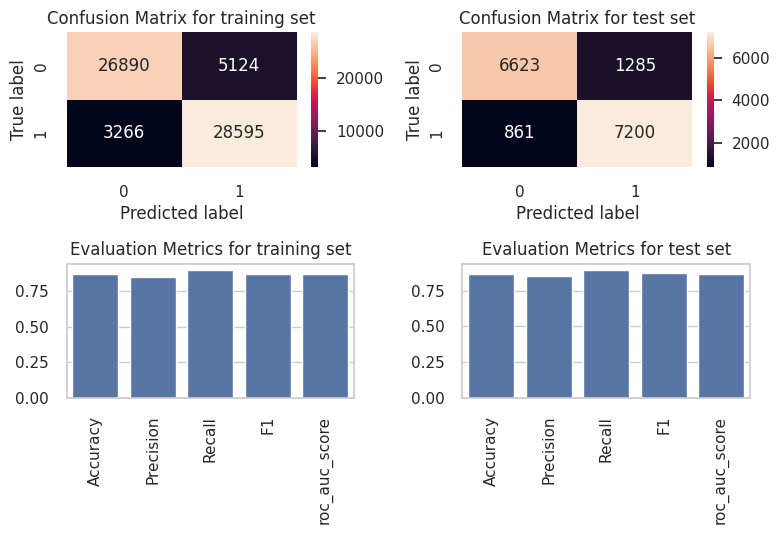

In [70]:
from sklearn.ensemble import RandomForestClassifier
# Fitting Random Forest model to training set
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
rf=classification_model(X_train, X_test, y_train, y_test, classifier_rf)

In [71]:
def plot_roc_curve(y_test, y_pred):
    # Generate a list of false and true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    # Plotting the ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

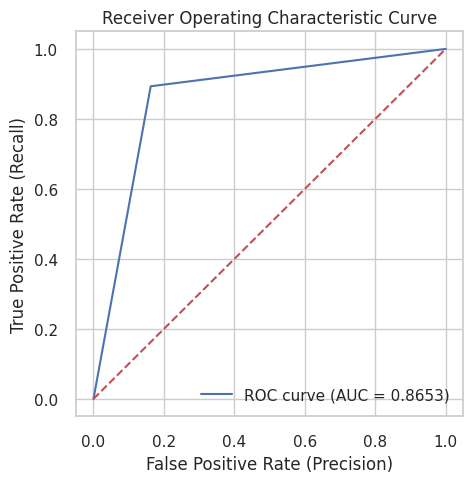

In [72]:
y_pred=rf['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **Cross-Validation & Hyperparameter Tuning**

In [73]:
from sklearn.model_selection import GridSearchCV

def classification_CV_model(X_train, X_test, y_train, y_test, clf, param_grid):
    ## Fit the model on training dataset
    classifier = clf
    model = GridSearchCV(classifier, param_grid, verbose=1, scoring='accuracy', cv=3, n_jobs=-1)
    model.fit(X_train, y_train)
    print(model)
    print('=='*45)

    # Print the best parameters and scores in a table
    cv_results_df = pd.DataFrame({
        'Parameter': list(model.best_params_.keys()),
        'Best Value': list(model.best_params_.values())
    })
    print("Best Parameters:")
    print(tabulate(cv_results_df, headers='keys', tablefmt='pretty'))

    print("\nBest Cross-validation Results:")
    cv_scores_df = pd.DataFrame({
        'Metric': ['Best Score'],
        'Value': [model.best_score_]
    })
    print(tabulate(cv_scores_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    print('\n-------------------------------\n')

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate the model
    print('Training set evaluation result:')
    cm_train = confusion_matrix(y_train, y_train_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)

    # Create DataFrame for training metrics
    train_metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
        'Value': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train]
    })
    print(tabulate(train_metrics_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    print("\nConfusion Matrix (Training Set):")
    cm_train_df = pd.DataFrame(cm_train,
                              columns=['Predicted Negative', 'Predicted Positive'],
                              index=['Actual Negative', 'Actual Positive'])
    print(tabulate(cm_train_df, headers='keys', tablefmt='pretty'))

    print("\nClassification Report (Training Set):")
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    train_report_df = pd.DataFrame(train_report).transpose()
    print(tabulate(train_report_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    print('\n-------------------------------\n')

    print('Test set evaluation result:')

    cm_test = confusion_matrix(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)

    # Create DataFrame for test metrics
    test_metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
        'Value': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test]
    })
    print(tabulate(test_metrics_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    print("\nConfusion Matrix (Test Set):")
    cm_test_df = pd.DataFrame(cm_test,
                             columns=['Predicted Negative', 'Predicted Positive'],
                             index=['Actual Negative', 'Actual Positive'])
    print(tabulate(cm_test_df, headers='keys', tablefmt='pretty'))

    print("\nClassification Report (Test Set):")
    test_report = classification_report(y_test, y_test_pred, output_dict=True)
    test_report_df = pd.DataFrame(test_report).transpose()
    print(tabulate(test_report_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

    ## Visualizes evaluation metrics
    fig,axes = plt.subplots(nrows=2, ncols=2)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0,0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[0,1], fmt='d')
    ax2.set_title('Confusion Matrix for test set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    ax3 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_train, precision_train, recall_train, f1_train, roc_auc_score_train], ax=axes[1,0])
    ax3.set_title('Evaluation Metrics for training set')
    ax3.tick_params(axis='x', rotation=90)
    ax4 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1','roc_auc_score'], y=[accuracy_test, precision_test, recall_test, f1_test, roc_auc_score_test], ax=axes[1,1])
    ax4.set_title('Evaluation Metrics for test set')
    ax4.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

    return {'model': model, 'y_train_pred': y_train_pred, 'y_test_pred': y_test_pred, 'cm_test': cm_test, 'accuracy_test': accuracy_test,
            'precision_test': precision_test, 'recall_test': recall_test, 'f1_test': f1_test, 'roc_auc_score_test': roc_auc_score_test}

Fitting 3 folds for each of 54 candidates, totalling 162 fits
GridSearchCV(cv=3,
             estimator=RandomForestClassifier(criterion='entropy',
                                              max_leaf_nodes=10,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=1)
Best Parameters:
+---+-------------------+------------+
|   |     Parameter     | Best Value |
+---+-------------------+------------+
| 0 |     max_depth     |     8      |
| 1 | min_samples_leaf  |     40     |
| 2 | min_samples_split |    150     |
| 3 |   n_estimators    |    100     |
+---+-------------------+------------+

Best Cross-validation Results:
+---+------------+-------------------+
|   |   Metric   |       Value       |
+---+------------+-

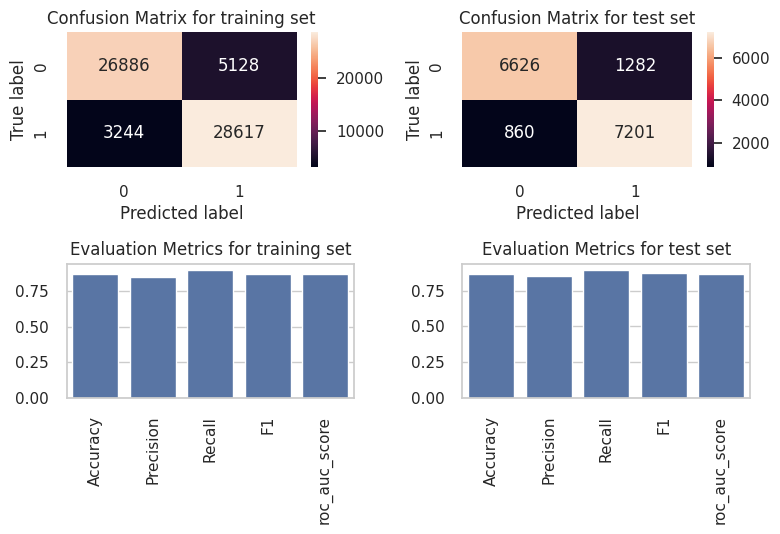

In [74]:
## Fitting Random Forest model to training set using cross validation
# Defining param_dict
param_grid = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
# Creating instance of Random Forest classifier
classifier_rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
# Fitting model
rf_cv=classification_CV_model(X_train, X_test, y_train, y_test, classifier_rf, param_grid)

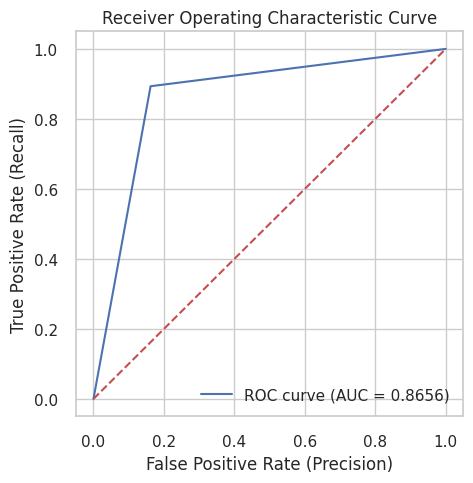

In [75]:
y_pred=rf_cv['y_test_pred']
plot_roc_curve(y_test, y_pred)

#### **Comparing Evaluation Metrics of Train/Test Split and Cross-Validation**

+----+----------------------+--------------------+--------------------+
|    | Evaluation Metrics   |   Train/Test Split |   Cross-Validation |
+====+======================+====================+====================+
|  0 | Accuracy             |           0.865615 |           0.865865 |
+----+----------------------+--------------------+--------------------+
|  1 | Precision            |           0.848556 |           0.848874 |
+----+----------------------+--------------------+--------------------+
|  2 | Recall               |           0.893189 |           0.893313 |
+----+----------------------+--------------------+--------------------+
|  3 | F1-score             |           0.870301 |           0.870527 |
+----+----------------------+--------------------+--------------------+
|  4 | roc_auc_score        |           0.865348 |           0.8656   |
+----+----------------------+--------------------+--------------------+




<Figure size 700x700 with 0 Axes>

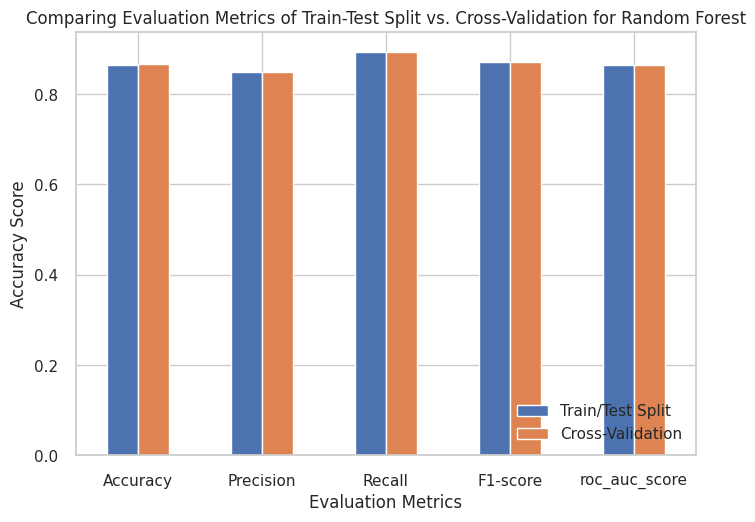

In [76]:
# Comparing evaluation metrics of train_test_split and GridSearchCV of Random Forest model

import pandas as pd
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score','roc_auc_score']
train_test_split = [rf['accuracy_test'],rf['precision_test'],rf['recall_test'],rf['f1_test'],rf['roc_auc_score_test']]
cross_validation = [rf_cv['accuracy_test'],rf_cv['precision_test'],rf_cv['recall_test'],rf_cv['f1_test'],rf_cv['roc_auc_score_test']]

# Create a dataframe
rf_evaluation_df = pd.DataFrame({'Evaluation Metrics': metrics,
                   'Train/Test Split': train_test_split,
                   'Cross-Validation': cross_validation})
# Print dataframe
print('=='*45)
print(tabulate(rf_evaluation_df, headers='keys', tablefmt='grid'))
print('\n', '=='*45, '\n')

# Create a barplot
plt.figure(figsize=(7,7))
ax=rf_evaluation_df.plot.bar(x='Evaluation Metrics', rot=0)

# Set the title and labels
ax.set_title("Comparing Evaluation Metrics of Train-Test Split vs. Cross-Validation for Random Forest")
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Accuracy Score")
ax.legend(loc="lower right")

# Show the plot
plt.show()
print('=='*45)

**Observations:**
- Cross-validation slightly improved the model's performance, but the impact was minimal, indicating the Random Forest model was already robust and its predictive power remained largely unchanged.

### **Artificial Neural Network - ANN**

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# Initialize the ANN
classifier = Sequential()
# Add the input layer and the first hidden layer
classifier.add(Dense(units = 51, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_dim = 34))
# Add the second hidden layer
classifier.add(Dense(units = 51,kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
# Add the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compile the ANN
adam = Adam(learning_rate=0.001)
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ANN to the Training set
classifier.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), batch_size = 10, epochs = 20)

Epoch 1/20
6388/6388 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8862 - loss: 0.2846 - val_accuracy: 0.9056 - val_loss: 0.2298
Epoch 2/20
6388/6388 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9113 - loss: 0.2134 - val_accuracy: 0.9111 - val_loss: 0.2113
Epoch 3/20
6388/6388 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9153 - loss: 0.2038 - val_accuracy: 0.9081 - val_loss: 0.2183
Epoch 4/20
6388/6388 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9174 - loss: 0.1980 - val_accuracy: 0.9084 - val_loss: 0.2095
Epoch 5/20
6388/6388 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9162 - loss: 0.1994 - val_accuracy: 0.9173 - val_loss: 0.2004
Epoch 6/20
6388/6388 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9181 - loss: 0.1969 - val_accuracy: 0.9159 - val_loss: 0.2003
Epoch 7/20
6388/6388 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9179 - loss: 0.1959 - val_accuracy: 0.9173 - val_loss: 0.2029
Epoch 8/20
6388/6388 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9189 - loss: 0

1997/1997 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Set Evaluation Result:
+---+---------------+--------------------+
|   |    Metric     |    Training Set    |
+---+---------------+--------------------+
| 0 |   Accuracy    | 0.922692759295499  |
| 1 |   Precision   | 0.926415154106877  |
| 2 |    Recall     | 0.9179247355701328 |
| 3 |   F1 Score    | 0.9221504020179726 |
| 4 | ROC AUC Score | 0.9226813657234683 |
+---+---------------+--------------------+

Training Set Confusion Matrix:
+-----------------+--------------------+--------------------+
|                 | Predicted Negative | Predicted Positive |
+-----------------+--------------------+--------------------+
| Actual Negative |       29691        |        2323        |
| Actual Positive |        2615        |       29246        |
+-----------------+--------------------+--------------------+

Training Set Classification Report:
+--------------+--------------------+-------------------

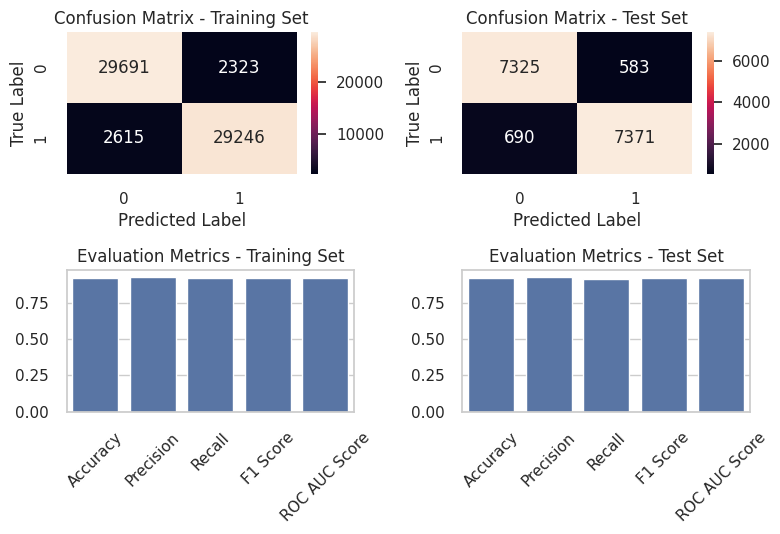

In [78]:
from sklearn.metrics import classification_report

# Make predictions
y_train_predict = classifier.predict(X_train_norm)
y_train_pred = (y_train_predict > 0.5)

y_test_predict = classifier.predict(X_test_norm)
y_test_pred = (y_test_predict > 0.5)

cm_train_ann = confusion_matrix(y_train, y_train_pred)
accuracy_train_ann = accuracy_score(y_train, y_train_pred)
precision_train_ann = precision_score(y_train, y_train_pred)
recall_train_ann = recall_score(y_train, y_train_pred)
f1_train_ann = f1_score(y_train, y_train_pred)
roc_auc_score_train_ann = roc_auc_score(y_train, y_train_pred)

cm_test_ann = confusion_matrix(y_test, y_test_pred)
accuracy_test_ann = accuracy_score(y_test, y_test_pred)
precision_test_ann = precision_score(y_test, y_test_pred)
recall_test_ann = recall_score(y_test, y_test_pred)
f1_test_ann = f1_score(y_test, y_test_pred)
roc_auc_score_test_ann=roc_auc_score(y_test, y_test_pred)

# Create evaluation metrics dataframes
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
train_scores = [accuracy_train_ann, precision_train_ann, recall_train_ann,
                f1_train_ann, roc_auc_score_train_ann]
test_scores = [accuracy_test_ann, precision_test_ann, recall_test_ann,
               f1_test_ann, roc_auc_score_test_ann]

eval_df1 = pd.DataFrame({
    'Metric': metrics,
    'Training Set': train_scores
})

eval_df2 = pd.DataFrame({
    'Metric': metrics,
    'Test Set': test_scores
})

# Format confusion matrices
train_cm_df = pd.DataFrame(
    cm_train_ann,
    columns=['Predicted Negative', 'Predicted Positive'],
    index=['Actual Negative', 'Actual Positive']
)

test_cm_df = pd.DataFrame(
    cm_test_ann,
    columns=['Predicted Negative', 'Predicted Positive'],
    index=['Actual Negative', 'Actual Positive']
)

# Generate classification reports
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Convert classification reports to DataFrames
train_report_df = pd.DataFrame(train_report).transpose()
test_report_df = pd.DataFrame(test_report).transpose()

# Print formatted tables
print("Training Set Evaluation Result:")
print(tabulate(eval_df1, headers='keys', tablefmt='pretty', floatfmt='.4f'))

print("\nTraining Set Confusion Matrix:")
print(tabulate(train_cm_df, headers='keys', tablefmt='pretty'))

print("\nTraining Set Classification Report:")
print(tabulate(train_report_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

print('\n-------------------------------\n')

print("Test Set Evaluation Result:")
print(tabulate(eval_df2, headers='keys', tablefmt='pretty', floatfmt='.4f'))

print("\nTest Set Confusion Matrix:")
print(tabulate(test_cm_df, headers='keys', tablefmt='pretty'))

print("\nTest Set Classification Report:")
print(tabulate(test_report_df, headers='keys', tablefmt='pretty', floatfmt='.4f'))

# Visualization with matplotlib and seaborn
fig, axes = plt.subplots(nrows=2, ncols=2)

# Confusion Matrix plots
sns.heatmap(cm_train_ann, annot=True, fmt='d', ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix - Training Set')
axes[0,0].set_ylabel('True Label')
axes[0,0].set_xlabel('Predicted Label')

sns.heatmap(cm_test_ann, annot=True, fmt='d', ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix - Test Set')
axes[0,1].set_ylabel('True Label')
axes[0,1].set_xlabel('Predicted Label')

# Metrics bar plots
sns.barplot(x=metrics, y=train_scores, ax=axes[1,0])
axes[1,0].set_title('Evaluation Metrics - Training Set')
axes[1,0].tick_params(axis='x', rotation=45)

sns.barplot(x=metrics, y=test_scores, ax=axes[1,1])
axes[1,1].set_title('Evaluation Metrics - Test Set')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

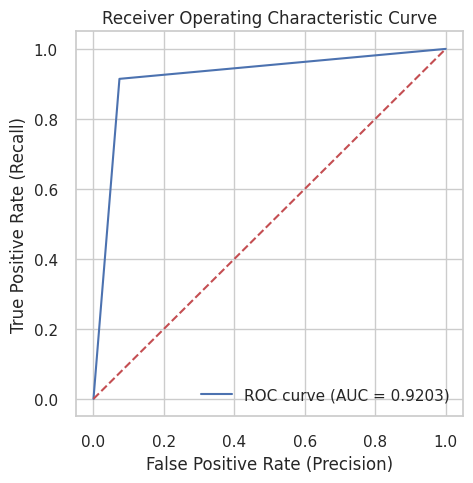

In [79]:
plot_roc_curve(y_test, y_test_pred)

## **Comparing Models based on the Evaluation Metrics**

In [80]:
import pandas as pd
from tabulate import tabulate

# Data
model = ['Random Forest', 'ANN']
Accuracy = [rf['accuracy_test'], accuracy_test_ann]
Precision = [rf['precision_test'], precision_test_ann]
Recall = [rf['recall_test'], recall_test_ann]
F1_score = [rf['f1_test'], f1_test_ann]
roc_auc_score = [rf['roc_auc_score_test'], roc_auc_score_test_ann]
confusion_matrix = [rf['cm_test'], cm_test_ann]

# Create a dataframe
models_evaluation_df = pd.DataFrame({
    'Model': model,
    'Accuracy': Accuracy,
    'Precision': Precision,
    'Recall': Recall,
    'F1 Score': F1_score,
    'ROC AUC Score': roc_auc_score,
    'Confusion Matrix': confusion_matrix
})

# Convert the dataframe to a tabulated format
table = tabulate(models_evaluation_df, headers='keys', tablefmt='grid')
print(table)

+----+---------------+------------+-------------+----------+------------+-----------------+--------------------+
|    | Model         |   Accuracy |   Precision |   Recall |   F1 Score |   ROC AUC Score | Confusion Matrix   |
+====+===============+============+=============+==========+============+=================+====================+
|  0 | Random Forest |   0.865615 |    0.848556 | 0.893189 |   0.870301 |        0.865348 | [[6623 1285]       |
|    |               |            |             |          |            |                 |  [ 861 7200]]      |
+----+---------------+------------+-------------+----------+------------+-----------------+--------------------+
|  1 | ANN           |   0.920283 |    0.926704 | 0.914403 |   0.920512 |        0.92034  | [[7325  583]       |
|    |               |            |             |          |            |                 |  [ 690 7371]]      |
+----+---------------+------------+-------------+----------+------------+-----------------+-----

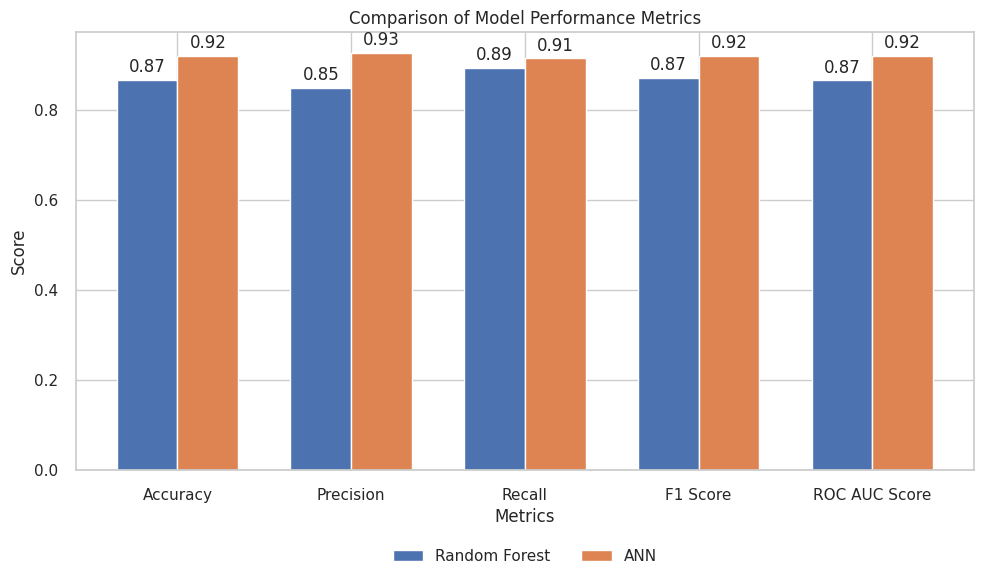

In [81]:
# Data preparation
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score']
models = ['Random_Forest', 'ANN']
values = [[rf['accuracy_test'], rf['precision_test'], rf['recall_test'], rf['f1_test'], rf['roc_auc_score_test']],
    [accuracy_test_ann, precision_test_ann, recall_test_ann, f1_test_ann, roc_auc_score_test_ann]]

values = np.array(values)

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width/2, values[0], width, label='Random Forest')
bar2 = ax.bar(x + width/2, values[1], width, label='ANN')

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()


**Observations:**
- The ANN model consistently outperforms the Random Forest model across all metrics, particularly in Precision (most significant difference) and Accuracy.

## **Conclusion**

- **The ANN model emerged as the most effective approach for predicting term deposits, outperforming other models by delivering highly accurate and reliable results. Its ability to capture complex patterns in the data makes it a valuable tool for making precise predictions in this context.**

- **Based on the analysis, the campaign strategy should prioritize targeting individuals in managerial and blue-collar job roles. These groups have demonstrated a higher likelihood of subscribing to term deposits, making them key segments for future marketing efforts. By focusing on these demographics, the campaign can achieve better results, optimize resources, and improve overall subscription rates.**